In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [11]:
# Here we are assigning values manually
d={"male":0,"female":1}
df["Gender"]=df.Sex.map(d)

In [12]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Gender
0,0,3,male,22.0,7.2500,0
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,1
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0


In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Gender        0
dtype: int64

In [14]:
df.Age=df['Age'].fillna(df.Age.mean())

### Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

<AxesSubplot:xlabel='Survived', ylabel='count'>

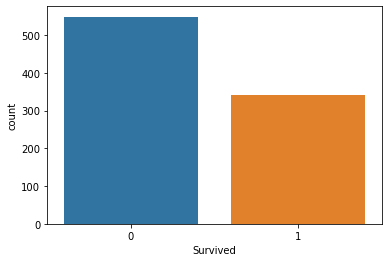

In [16]:
sn.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

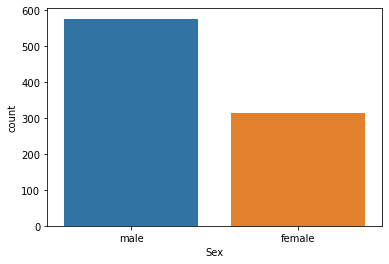

In [17]:
sn.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

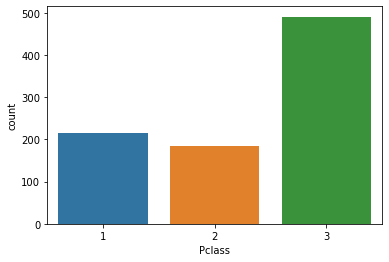

In [18]:
sn.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

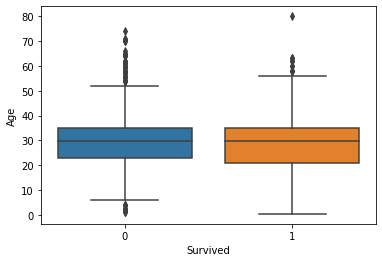

In [19]:
sn.boxplot(y='Age',x='Survived',data=df)

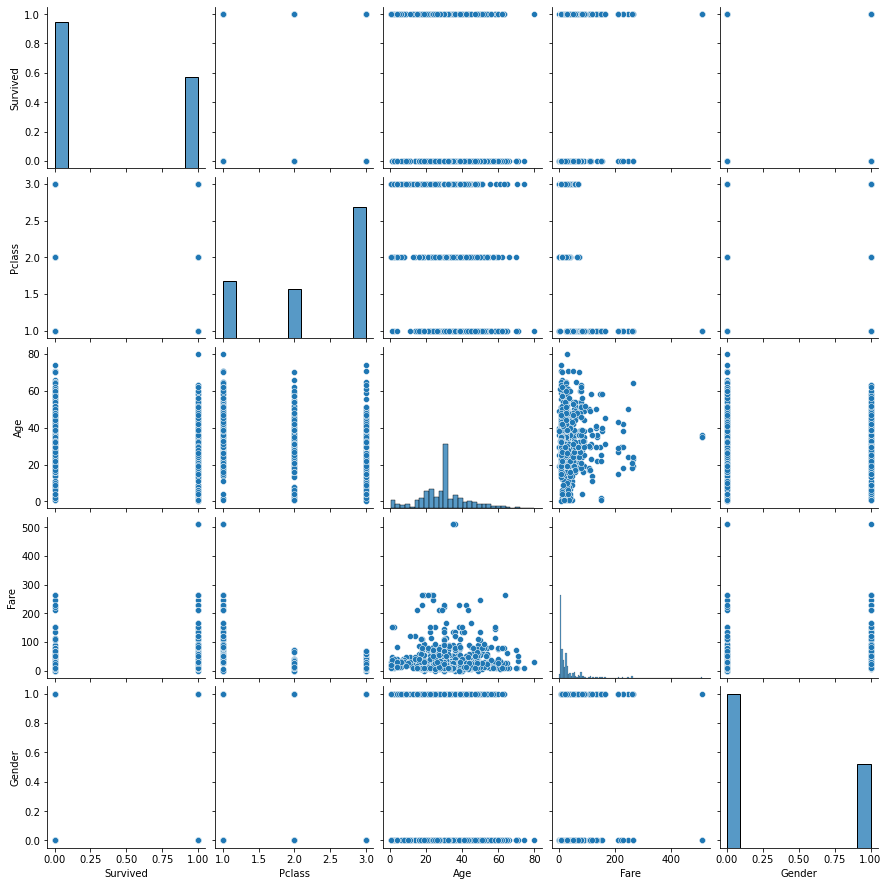

In [20]:
sn.pairplot(df)

In [21]:
x = df.drop(["Survived","Sex"],axis=1)
y = df.Survived

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [24]:
len(X_train)

712

In [25]:
len(X_test)

179

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
model.score(X_train,y_train)

0.9845505617977528

In [25]:
model.score(X_test,y_test)

0.7821229050279329

In [26]:
pred=model.predict(X_test)
pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix ,classification_report

In [28]:
cm=confusion_matrix(y_test,pred)
cm

array([[96, 19],
       [20, 44]])

In [29]:
import seaborn as sn

<AxesSubplot:>

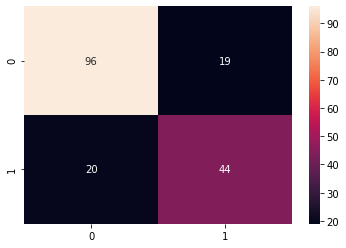

In [30]:
sn.heatmap(cm,annot=True,fmt='d')

In [31]:
96/(96+19)

0.8347826086956521

In [32]:
(96+45)/(96+19+45+19)

0.7877094972067039

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       115
           1       0.70      0.69      0.69        64

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

